In [3]:
import pandas as pd


df_train = pd.read_csv('/kaggle/input/ag-news-classification-dataset/train.csv')
df_test = pd.read_csv('/kaggle/input/ag-news-classification-dataset/test.csv')

df_train

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [4]:
df_test

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [5]:
print(f'Train Dataset: {df_train.shape}')

print(f'\nTest Dataset: {df_test.shape}')

Train Dataset: (120000, 3)

Test Dataset: (7600, 3)


In [6]:
news_df = df_train.copy()
news_df['news'] = df_train['Title'] + " " + df_train['Description']


news_df.drop(columns=['Title', 'Description'], inplace=True)
news_df

,Class Index,news
0,3,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new..."
...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...
119996,2,Renteria signing a top-shelf deal Red Sox gene...
119997,2,Saban not going to Dolphins yet The Miami Dolp...
119998,2,Today's NFL games PITTSBURGH at NY GIANTS Time...


In [7]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   news         120000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [8]:
news_df['Class Index'].value_counts()

Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64

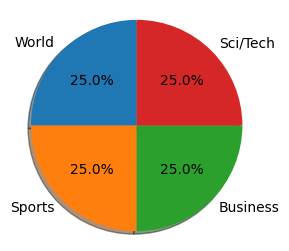

In [9]:
import matplotlib.pyplot as plt

labels = news_df['Class Index'].unique()

real_labels = ['World', 'Sports', 'Business', 'Sci/Tech']

sizes = []
for i in labels:

    size = len(news_df[news_df['Class Index'] == i])

    sizes.append(size)

fig = plt.figure(figsize=(3, 3))

plt.pie(sizes, labels=real_labels, autopct='%1.1f%%',

        shadow=True, startangle=90)

plt.axis('equal')  
plt.show()

In [10]:
x_train = news_df['news']
y_train = news_df['Class Index']


x_test = df_test['Description']
y_test = df_test['Class Index']

In [11]:
!pip install spacy

In [12]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 78.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [13]:

!pip install -U gensim
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

import os
import sys
import re
import string
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models.phrases import Phraser, Phrases, ENGLISH_CONNECTOR_WORDS

import spacy
from wordcloud import WordCloud
from termcolor import colored


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 44.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tsfresh 0.20.3 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

In [15]:
import re
import string
import spacy
from gensim.utils import simple_preprocess
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as STOPWORDS 
import spacy



def process_description(description):


    pattern = re.compile(r'<.*?>')

    description = description.map(lambda x: re.sub(pattern, '', x))

    pattern = re.compile(r'https?://\S+|www\.\S+')

    description = description.map(lambda x: re.sub(pattern, '', x).strip())

    description = description.map(lambda x: x.lower())


    def sent_to_words(sentences):

        for sentence in sentences:

            yield(simple_preprocess(str(sentence), deacc=False))

    

    data = description.tolist()

    disc_tokens = list(sent_to_words(data))



    disc_tokens = [[token for token in sentence if token not in string.punctuation] for sentence in disc_tokens]
        

   

    disc_tokens = [[token for token in sentence if token not in string.digits] for sentence in disc_tokens]

    

   

    def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):

        nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

        texts_out = []

        for sent in texts:

            doc = nlp(" ".join(sent)) 

            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

        return texts_out
    

    description_lem = lemmatization(disc_tokens)

    my_stop_words = STOPWORDS.union(set(['company', 'year', 'yesterday', 'week', 'new', 'reuter']))

    description_clean = [[token for token in sentence if token not in my_stop_words] for sentence in description_lem]

    

   

    bigram = Phrases(description_clean, min_count=5, threshold=100) 


    bigram_mod = Phraser(bigram)

    

    description_clean = [bigram_mod[sentence] for sentence in description_clean]



    return description_clean

In [16]:
import spacy

x_train_clean = process_description(x_train)

x_test_clean = process_description(x_test)


x_clean = x_train_clean + x_test_clean




Y = pd.concat([y_train, y_test]).reset_index(drop=True)




print('A sample original description\n', x_train[0])

print('\nProcessed description\n', x_train_clean[0])

A sample original description
 Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.

Processed description
 ['bear', 'claw', 'black', 'short', 'seller', 'dwindle', 'band', 'ultra', 'cynic', 'green']


In [17]:
x_train_join = [' '.join(tokens) for tokens in x_train_clean]

tfidf_vectorizer = TfidfVectorizer()


x_train_vec = tfidf_vectorizer.fit_transform(x_train_join)


x_test_join = [' '.join(tokens) for tokens in x_test_clean]

x_test_vec = tfidf_vectorizer.transform(x_test_join)


print(f'x_train_vec: {x_train_vec.shape}')

print(f'x_test_vec: {x_test_vec.shape}')

x_train_vec: (120000, 40370)
x_test_vec: (7600, 40370)


In [18]:
from sklearn.feature_extraction.text import CountVectorizer


count_vectorizer = CountVectorizer(
    lowercase=True,
    stop_words=None,         
    max_features=10000,       
    vocabulary=None,          
    binary=False              
)


x_train_vec = count_vectorizer.fit_transform(x_train_join)


x_test_vec = count_vectorizer.transform(x_test_join)

print(f'x_train_vec: {x_train_vec.shape}')
print(f'x_test_vec: {x_test_vec.shape}')
print(count_vectorizer.vocabulary_)  


x_train_vec: (120000, 10000)
x_test_vec: (7600, 10000)
{'bear': 766, 'claw': 1562, 'black': 886, 'short': 8012, 'seller': 7863, 'dwindle': 2756, 'band': 671, 'ultra': 9344, 'green': 3831, 'look': 5134, 'commercial': 1720, 'aerospace': 160, 'private': 6750, 'investment': 4622, 'firm': 3372, 'group': 3866, 'reputation': 7343, 'make': 5236, 'time': 9076, 'occasionally': 5964, 'controversial': 1922, 'play': 6500, 'defense': 2288, 'industry': 4416, 'quietly': 6960, 'place': 6479, 'bet': 829, 'market': 5310, 'oil': 5994, 'economy': 2802, 'cloud': 1613, 'stock': 8558, 'outlook': 6111, 'soar': 8229, 'crude': 2115, 'price': 6723, 'worry': 9926, 'earning': 2770, 'expect': 3123, 'hang': 3957, 'depth': 2376, 'summer': 8701, 'halt': 3930, 'export': 3155, 'main': 5222, 'southern': 8304, 'pipeline': 6461, 'authority': 575, 'flow': 3438, 'intelligence': 4544, 'rebel': 7109, 'militia': 5504, 'strike': 8608, 'infrastructure': 4453, 'official': 5985, 'say': 7729, 'record': 7150, 'pose': 6599, 'menace': 5

In [19]:
def report_confusion_matrix(y_test, y_pred):
  

    class_names = ['World', 'Sports', 'Business', 'Sci/Tech']


    print(classification_report(y_test, y_pred, target_names=class_names))

    
    conf_matrix = confusion_matrix(y_test, y_pred)


    plt.figure(figsize=(5, 4))

    sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Labels')

    plt.ylabel('Real Labels')

    plt.title('Confusion Matrix')

    plt.show()

Accuracy: 87.04 %

Total Runtime: 2.80 s (0.05 min)

              precision    recall  f1-score   support

       World       0.88      0.87      0.87      1900
      Sports       0.94      0.95      0.94      1900
    Business       0.83      0.82      0.82      1900
    Sci/Tech       0.84      0.84      0.84      1900

    accuracy                           0.87      7600
   macro avg       0.87      0.87      0.87      7600
weighted avg       0.87      0.87      0.87      7600



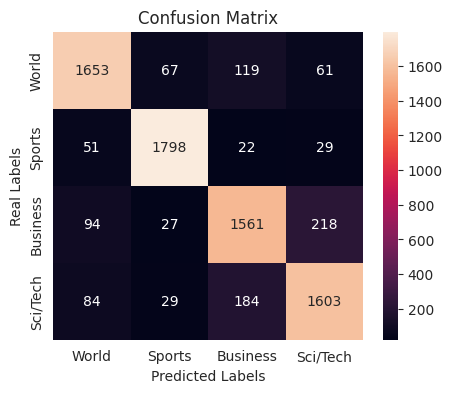

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
munb = Pipeline([

    ('tfidf', TfidfVectorizer()),

    ('clf', MultinomialNB())

])



start = time.time()


munb.fit(x_train_join, y_train)


munb_predict = munb.predict(x_test_join)


print(f'Accuracy: {accuracy_score(y_test, munb_predict) * 100:.2f} %\n')


tot_time = time.time() - start

print(f"Total Runtime: {tot_time:.2f} s ({(tot_time/60):.2f} min)\n")


report_confusion_matrix(y_test, munb_predict)

Accuracy: 86.38 %

Total Runtime: 5.96 s (0.10 min)

              precision    recall  f1-score   support

       World       0.87      0.87      0.87      1900
      Sports       0.93      0.95      0.94      1900
    Business       0.83      0.80      0.82      1900
    Sci/Tech       0.83      0.84      0.83      1900

    accuracy                           0.86      7600
   macro avg       0.86      0.86      0.86      7600
weighted avg       0.86      0.86      0.86      7600



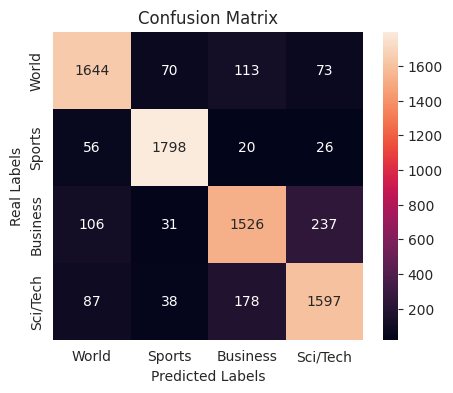

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

munb = Pipeline([
    ('count_vec', CountVectorizer(lowercase=True, max_features=10000)),
    ('clf', MultinomialNB())
])

munb.fit(x_train_join, y_train)
munb_predict = munb.predict(x_test_join)
print(f'Accuracy: {accuracy_score(y_test, munb_predict) * 100:.2f} %\n')


tot_time = time.time() - start

print(f"Total Runtime: {tot_time:.2f} s ({(tot_time/60):.2f} min)\n")


report_confusion_matrix(y_test, munb_predict)

In [22]:
parameters = {'clf__alpha': (1, 1e-2, 1e-3)}


gs_clf = GridSearchCV(munb, parameters, cv=5, n_jobs=-1)

gs_clf = gs_clf.fit(x_train_join, y_train)



print("Best Hyperparameters:", gs_clf.best_params_)

print("Best Score: ", gs_clf.best_score_)

Best Hyperparameters: {'clf__alpha': 0.01}
Best Score:  0.86965


MultinomialNB Best Accuracy: 86.49 %

              precision    recall  f1-score   support

       World       0.87      0.86      0.87      1900
      Sports       0.93      0.95      0.94      1900
    Business       0.83      0.80      0.81      1900
    Sci/Tech       0.83      0.84      0.83      1900

    accuracy                           0.86      7600
   macro avg       0.86      0.86      0.86      7600
weighted avg       0.86      0.86      0.86      7600



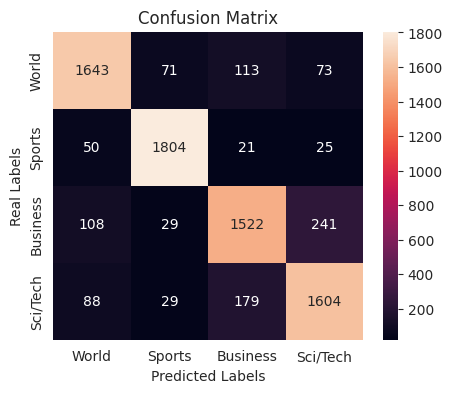

In [23]:
mulnb_predict = gs_clf.predict(x_test_join)


print(f'MultinomialNB Best Accuracy: {accuracy_score(y_test, mulnb_predict) * 100:.2f} %\n')


report_confusion_matrix(y_test, mulnb_predict)

In [25]:
from sklearn.preprocessing import LabelEncoder
labels = ['World News', 'Sports News', 'Business News', 'Science-Technology News']


label_encoder = LabelEncoder()
label_encoder.fit(labels)


new_text_data = ["dream team stun greece upset historic inevitable man_basketball team lose time olympic"]


new_predictions = munb.predict(new_text_data)


new_prediction_label = label_encoder.inverse_transform(new_predictions)


print(f"Predicted Class Name: {new_prediction_label[0]}")

Predicted Class Name: Sports News


In [31]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


munb.fit(x_train_join, y_train_encoded)


new_text_data = ["golf end win championship number rank tiger_wood"]


new_predictions = munb.predict(new_text_data)


new_prediction_labels = label_encoder.inverse_transform(new_predictions)


print(f"Predicted Class Name: {new_prediction_labels[0]}")


y_test_encoded = label_encoder.transform(y_test)


test_predictions = munb.predict(x_test_join)


test_predictions_labels = label_encoder.inverse_transform(test_predictions)
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

for true_label, pred_label in zip(y_test_labels, test_predictions_labels):
    print(f"True Class : {true_label}, Predicted Class: {pred_label}")

Predicted Class Name: 2
True Class : 3, Predicted Class: 3
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 2
True Class : 4, Predicted Class: 1
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 1
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 1
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 3
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 4
True Class : 4, Predicted Class: 3
True Class : 4, Predicted Class: 3
True Class : 4, Predicted Class: 4
True Class : 2, Predicted Class: 2
True Class : 2, Predicted Class